In [1]:
import pandas as pd
from pandas import Series, DataFrame
import string
import numpy as np
import re
%matplotlib nbagg
import matplotlib.pylab as plt
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
path = 'train.csv'

In [3]:
titanic_train = pd.read_table(path, sep = ",")

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


####Field Definitions:
    *survival        Survival (0 = No; 1 = Yes)
    *pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    *name            Name
    *sex             Sex
    *age             Age
    *sibsp           Number of Siblings/Spouses Aboard
    *parch           Number of Parents/Children Aboard
    *ticket          Ticket Number
    *fare            Passenger Fare
    *cabin           Cabin
    *embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


###Feature engineering

In [5]:
##titles = titanic_train['Name'].tolist()
titanic_train['Name'].str.extract(',(.*)\.').unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Mrs. Martin (Elizabeth L', ' Lady', ' Sir',
       ' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkheer'], dtype=object)

In [6]:
def return_title(x):
    name = re.search(',(.*)\.', x['Name']).group(1)
    sex = x['Sex']
    if any(title in name for title in ['Countess', 'Mme', 'Mrs']):
        return 'Mrs'
    elif any(title in name for title in ['Don', 'Master', 'Rev', 'Jonkheer', 'Mr', 'Sir']):
        return 'Mr'
    elif any(title in name for title in ['Major', 'Col', 'Capt']):
        return 'Military'
    elif any(title in name for title in ['Mlle', 'Ms', 'Miss', 'Lady']):
        return 'Miss'
    elif any(title in name for title in ['Dr']):
        if sex == 'Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return name

In [7]:
re.search(',(.*)\.', titanic_train['Name'].iloc[0]).group(1)

' Mr'

In [8]:
##map function: map(f, iterable) basically applies the function to every iteration
##apply: Applies function along input asix of DataFrame
titanic_train['Title'] = titanic_train.apply(return_title, axis=1)

In [9]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Mr
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,Mrs


In [10]:
titanic_train['Title'].value_counts()

Mr          566
Miss        186
Mrs         134
Military      5
dtype: int64

In [11]:
titanic_train['Survived'].value_counts()

0    549
1    342
dtype: int64

In [12]:
## turn sex into boolean
sex = {'male':True, 'female':False}
titanic_train.Sex = titanic_train['Sex'].map(sex)

###Dummy variables should be integers before entering into Random Forest as it takes less processing power
###REMEMBER: Feature build on the first letter in cabin

In [34]:
## will need to filter this down to discrete or continuous fields
num_titanic_train = titanic_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']]
num_titanic_train.head()
## pairplot instead of scatter_matric
##scatter_matrix(num_titanic_train, alpha=0.05, figsize=(10, 10), diagonal='kde')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,True,22,1,0,7.2500,Mr
1,1,1,False,38,1,0,71.2833,Mrs
2,1,3,False,26,0,0,7.9250,Miss
3,1,1,False,35,1,0,53.1000,Mrs
4,0,3,True,35,0,0,8.0500,Mr


In [35]:
# How many NaNs are there?
num_titanic_train['Age'].isnull().sum()

177

In [36]:
#177 nulls
num_titanic_train = num_titanic_train.dropna()

<IPython.core.display.Javascript object>


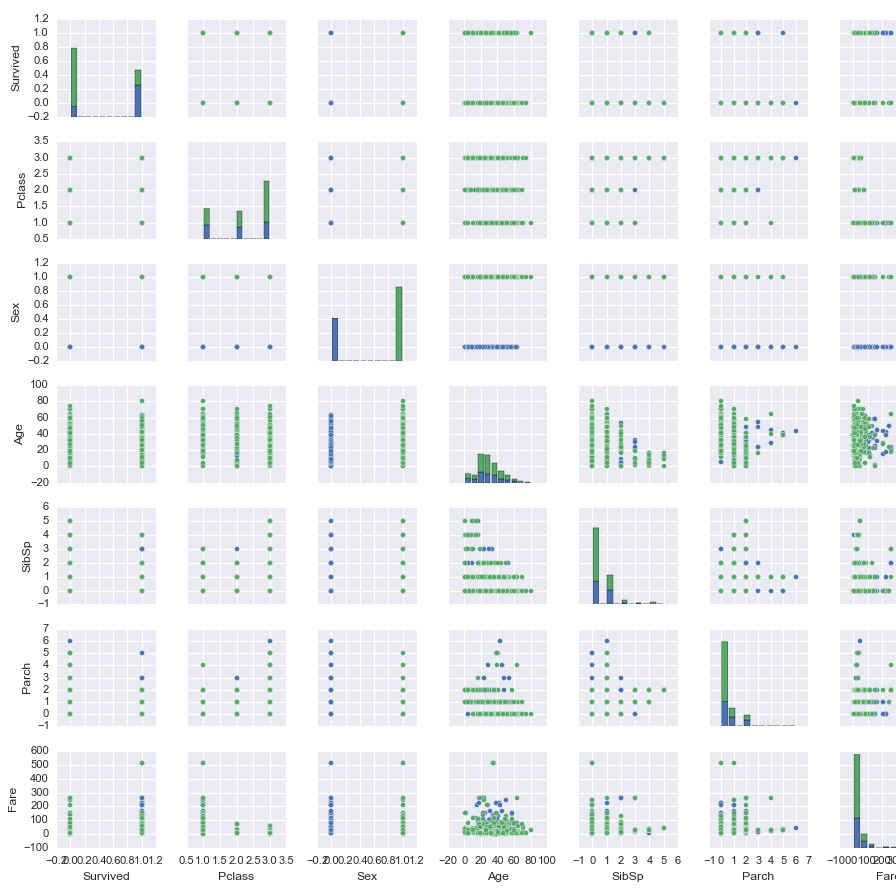

AttributeError: 'PairGrid' object has no attribute 'plt'

In [50]:
g = sns.pairplot(num_titanic_train, size = 1.60, hue='Sex')
g.plt.title("hello")